In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [52]:
X = load_boston()['data']
y = load_boston()['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [53]:
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

def L_derivative(y_train, z):
    return (y_train - z)

In [54]:
%%time
base_algorithms_list = []
coefficients_list = []
n_iter = 50

z = np.zeros(y_train.shape[0])
for i in range(n_iter):
    tree = DecisionTreeRegressor(random_state=42, max_depth=5)
    coefficients_list.append(0.9)
    tree.fit(X_train, L_derivative(y_train, z))
    base_algorithms_list.append(tree)
    z = gbm_predict(X_train)
    
pred = gbm_predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))

with open('2_gb.txt', 'w') as f:
    f.write(str(rmse))
print(rmse)

5.455565103009402
CPU times: user 34.2 s, sys: 305 ms, total: 34.5 s
Wall time: 35.8 s


In [55]:
%%time
base_algorithms_list = []
coefficients_list = []
n_iter = 50

z = np.zeros(y_train.shape[0])
for i in range(n_iter):
    coef = 0.9 / (1.0 + i)
    tree = DecisionTreeRegressor(random_state=42, max_depth=5)
    coefficients_list.append(coef)
    tree.fit(X_train, L_derivative(y_train, z))
    base_algorithms_list.append(tree)
    z = gbm_predict(X_train)
    
pred = gbm_predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))

with open('3_gb.txt', 'w') as f:
    f.write(str(rmse))
print(rmse)

4.812550945781193
CPU times: user 35.5 s, sys: 417 ms, total: 35.9 s
Wall time: 37.9 s


In [57]:
import xgboost as xgb

[13:24:39] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:24:39] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:24:39] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:24:40] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:24:40] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:24:40] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is n

[13:24:50] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:24:51] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:24:51] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:24:52] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:24:52] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:24:53] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is n

[13:25:19] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:20] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:20] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 38 s, sys: 585 ms, total: 38.6 s
Wall time: 41.8 s


Text(0, 0.5, 'RMSE')

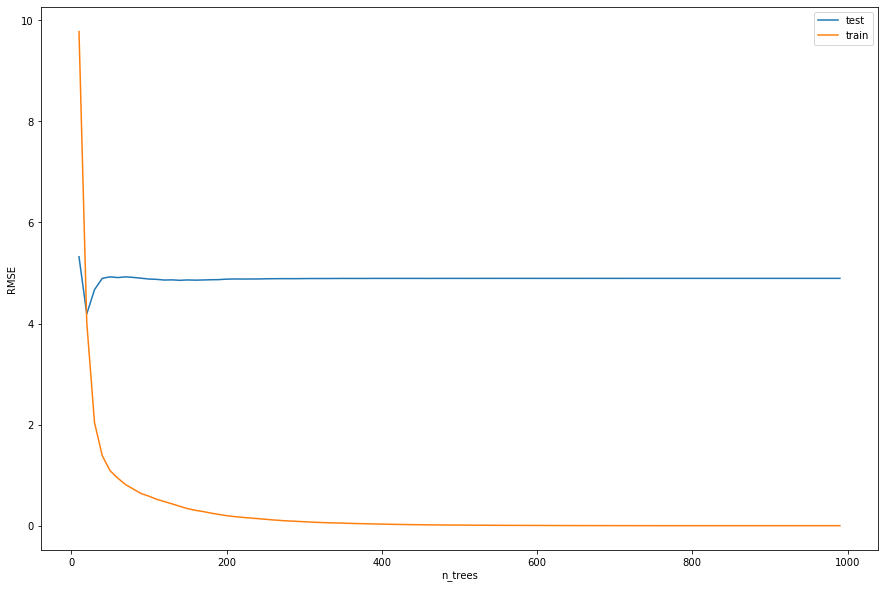

In [102]:
%%time
import warnings
warnings.filterwarnings('ignore')
n_trees = np.arange(10, 1000, 10)

scores_test = []
scores_train = []

for n in n_trees:
    model = xgb.XGBRegressor(random_state=42, n_estimators=n, max_depth=5)
    bs = model.fit(X_train, y_train)
    scores_train.append(np.sqrt(mean_squared_error(y_train, bs.predict(X_train))))
    scores_test.append(np.sqrt(mean_squared_error(y_test, bs.predict(X_test))))
    
plt.rcParams["figure.figsize"] = (15,10)

sns.lineplot(n_trees, scores_test, label='test')
sns.lineplot(n_trees, scores_train, label='train')
plt.xlabel('n_trees')
plt.ylabel('RMSE');

[13:25:21] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:21] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:21] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:21] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:22] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:22] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is n

[13:25:25] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:25] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:25] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:25] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:25] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:26] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is n

[13:25:29] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:29] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:29] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 7.52 s, sys: 73.8 ms, total: 7.59 s
Wall time: 7.86 s


Text(0, 0.5, 'RMSE')

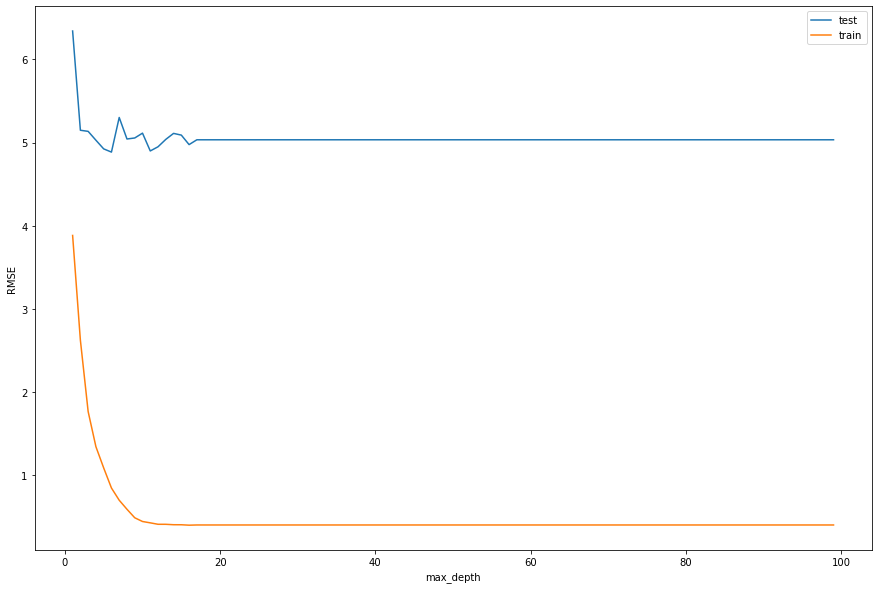

In [103]:
%%time
import warnings
warnings.filterwarnings('ignore')
max_depth = np.arange(1, 100, 1)

scores_test = []
scores_train = []

for n in max_depth:
    model = xgb.XGBRegressor(random_state=42, n_estimators=50, max_depth=n)
    bs = model.fit(X_train, y_train)
    scores_train.append(np.sqrt(mean_squared_error(y_train, bs.predict(X_train))))
    scores_test.append(np.sqrt(mean_squared_error(y_test, bs.predict(X_test))))
    
plt.rcParams["figure.figsize"] = (15,10)

sns.lineplot(max_depth, scores_test, label='test')
sns.lineplot(max_depth, scores_train, label='train')
plt.xlabel('max_depth')
plt.ylabel('RMSE');

In [104]:
from sklearn.linear_model import LinearRegression

In [106]:
lr = LinearRegression()
lr.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))

In [108]:
with open('5_gb.txt', 'w') as f:
    f.write(str(rmse))